In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.linear_model import LogisticRegression

**1. Data Exploration:**

a. Load the dataset and perform exploratory data analysis (EDA).

b. Examine the features, their types, and summary statistics.

c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

Analyze any patterns or correlations observed in the data.

In [44]:
test_data = pd.read_csv('/content/Titanic_test.csv')
train_data = pd.read_csv('/content/Titanic_train.csv')

print('Training data : \n ', train_data.head(5))
print('\n', 'Testing data : \n ', test_data.head(5))
print(train_data.columns)

Training data : 
     PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500 

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


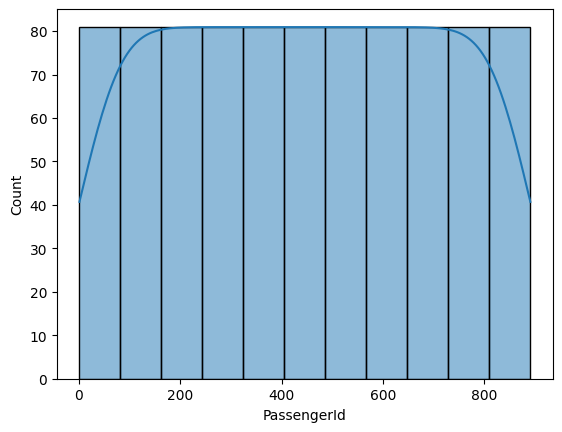

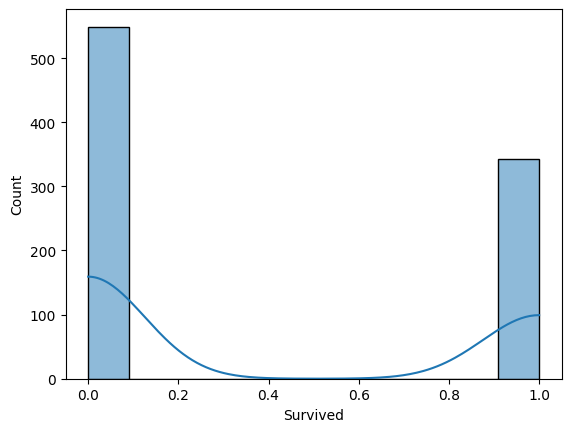

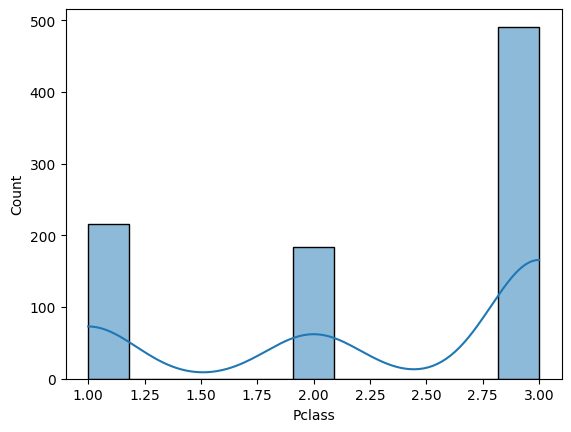

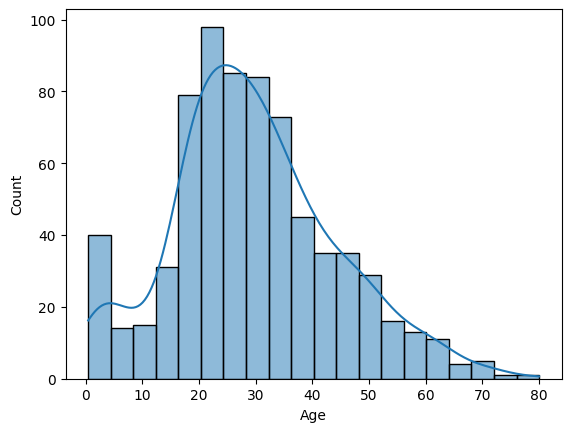

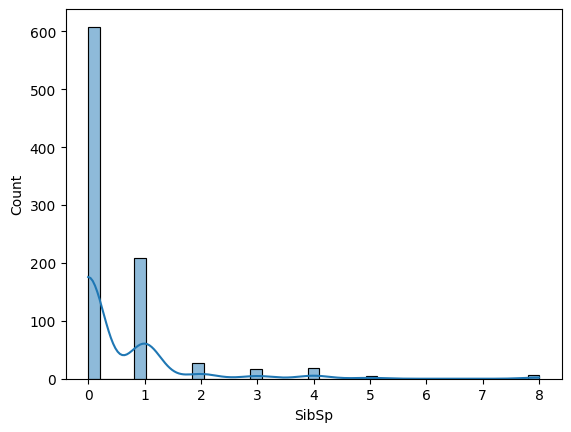

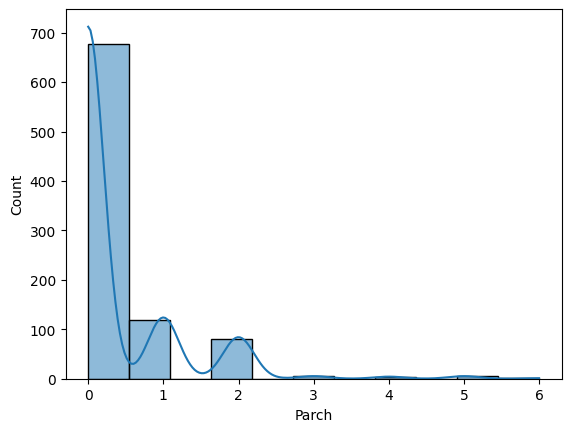

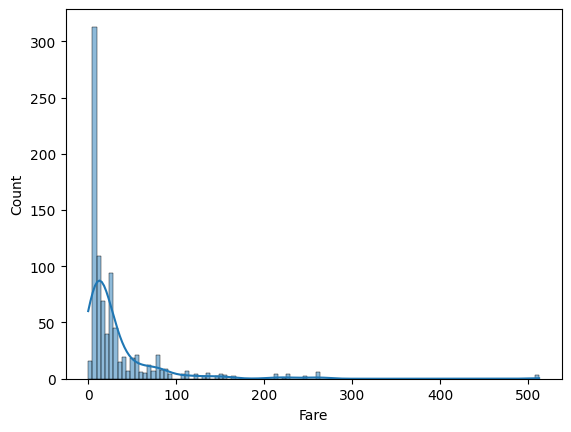

In [6]:
numeric_cols = train_data.select_dtypes(include = np.number).columns
for col in numeric_cols:
  sea.histplot(train_data[col], kde = True)
  plt.show()

**2. Data Preprocessing:**

a. Handle missing values (e.g., imputation).

b. Encode categorical variables.

In [7]:
# To check for missing (NaN/Null) entries in a dataset
#print(train_data.columns)
print('Number of missing (NaN/null) entries in each column \n', train_data.isnull().sum())
print('% of missing (NaN/null) entries in each column \n', round((train_data.isnull().sum()/len(train_data)*100), 2))

Number of missing (NaN/null) entries in each column 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
% of missing (NaN/null) entries in each column 
 PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


In the column Cabin there are nearly 77% of the data missing and so it can be dropped.

In [8]:
#train_data.drop('Cabin', axis=1, inplace=True)
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
# To check duplicates in the dataset
train_data[train_data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [10]:
# To get more information about the missing data in Age and Embarked variables
print(numeric_cols)
num_train_data = train_data[numeric_cols]
non_numeric_cols = train_data.select_dtypes(exclude = np.number).columns
print(non_numeric_cols)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


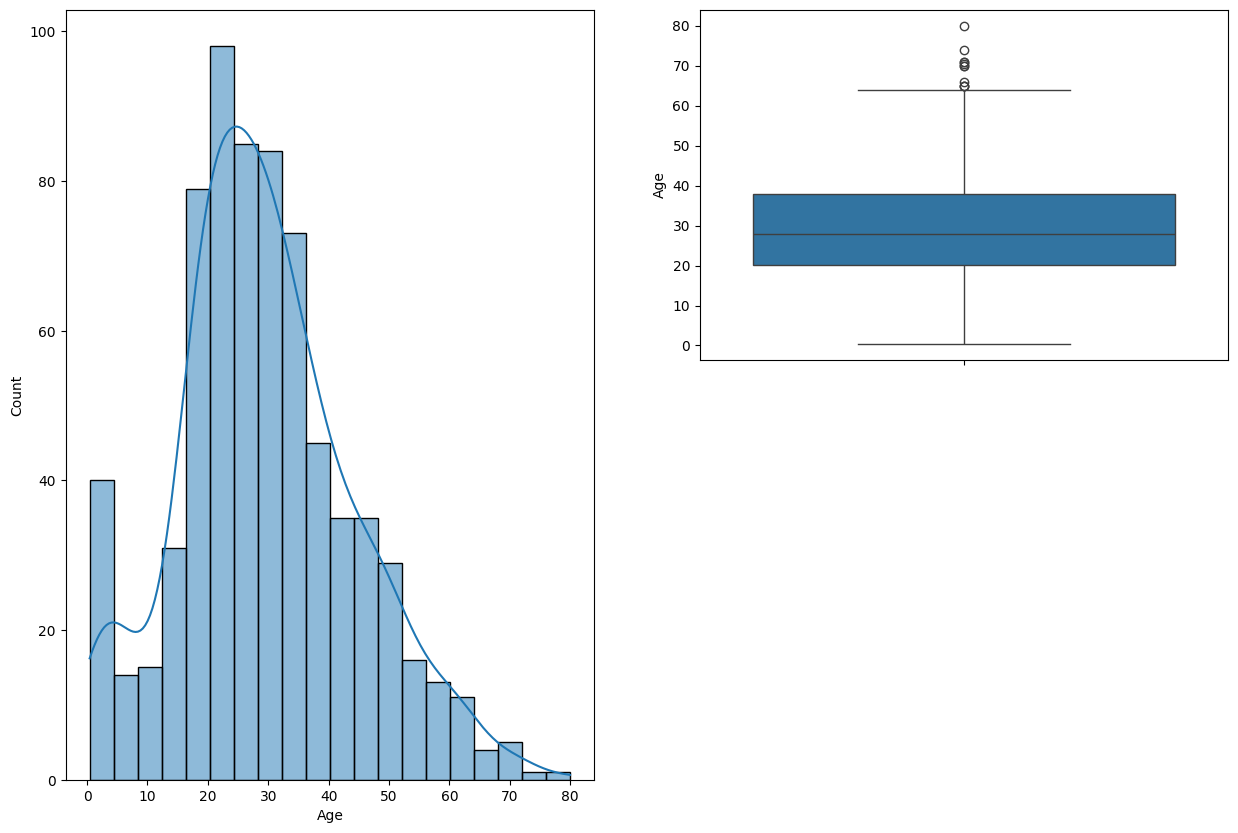

Skewed  0.3891
Kurtosis  0.1783
Mean  29.6991
Median  28.0
Mode  0    24.0
Name: Age, dtype: float64


<Axes: >

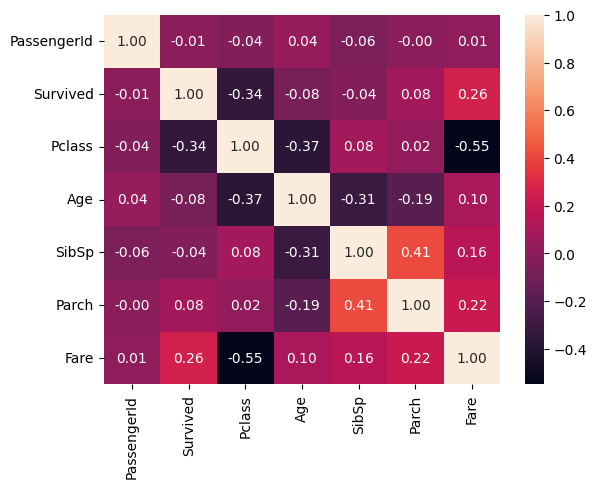

In [11]:
plt.figure(figsize = (15, 10))

plt.subplot(1, 2, 1)
sea.histplot(train_data['Age'], kde = True)

plt.subplot(2, 2, 2)
sea.boxplot(train_data['Age'])
plt.show()

print('Skewed ', round(train_data['Age'].skew(), 4))
print('Kurtosis ', round(train_data['Age'].kurt(), 4))
print('Mean ', round(train_data['Age'].mean(), 4))
print('Median ', round(train_data['Age'].median(), 4))
print('Mode ', round(train_data['Age'].mode(), 4))
sea.heatmap(num_train_data.corr(), annot = True, fmt = '.2f')

**Imputation**

About 20% of the data in the Age column is missing. The data is slightly right skewed and the mean is relatively close to the median. Hence, imputing Age using median.

In [12]:
train_data['Age_imput'] = train_data['Age'].fillna(train_data['Age'].median())
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_imput    891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


**Dropping**

About 0.22% of the data is missing in the column Embarked. As this is relatively a small set, they can be dropped.

In [14]:
#mod_train_data = train_data
#mod_train_data.drop('Cabin', axis = 1, inplace = True)
#mod_train_data.drop('Age', axis = 1, inplace = True)
#mod_train_data = mod_train_data.dropna()

#mod_train_data.info()

#mod_train_data.reset_index(drop = True, inplace = True)
mod_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
 10  Age_imput    889 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 76.5+ KB


In [15]:
# Encodeing categorical data
mod_train_data = pd.get_dummies(mod_train_data, columns = ['Sex', 'Embarked'], drop_first = True)
mod_train_data

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Age_imput,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,22.0,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,38.0,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,26.0,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,35.0,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,35.0,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",0,0,211536,13.0000,27.0,True,False,True
885,888,1,1,"Graham, Miss. Margaret Edith",0,0,112053,30.0000,19.0,False,False,True
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,W./C. 6607,23.4500,28.0,False,False,True
887,890,1,1,"Behr, Mr. Karl Howell",0,0,111369,30.0000,26.0,True,False,False


In [16]:
# Converting encoded data into boolean
mod_train_data['Embarked_Q'] = mod_train_data['Embarked_Q'].astype('int64')
mod_train_data['Embarked_S'] = mod_train_data['Embarked_S'].astype('int64')
mod_train_data['Sex_male'] = mod_train_data['Sex_male'].astype('int64')
mod_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Ticket       889 non-null    object 
 7   Fare         889 non-null    float64
 8   Age_imput    889 non-null    float64
 9   Sex_male     889 non-null    int64  
 10  Embarked_Q   889 non-null    int64  
 11  Embarked_S   889 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 83.5+ KB


In [16]:
#pd.crosstab([train_data['Sex'], train_data['Ticket']], train_data['Age'], margins = True)

**3. Model Building:**

a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

b. Train the model using the training data.

In [17]:
X = mod_train_data[['Pclass', 'SibSp', 'Fare', 'Age_imput', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
Y = mod_train_data['Survived']

print(X)
print(Y)

     Pclass  SibSp     Fare  Age_imput  Sex_male  Embarked_Q  Embarked_S
0         3      1   7.2500       22.0         1           0           1
1         1      1  71.2833       38.0         0           0           0
2         3      0   7.9250       26.0         0           0           1
3         1      1  53.1000       35.0         0           0           1
4         3      0   8.0500       35.0         1           0           1
..      ...    ...      ...        ...       ...         ...         ...
884       2      0  13.0000       27.0         1           0           1
885       1      0  30.0000       19.0         0           0           1
886       3      1  23.4500       28.0         0           0           1
887       1      0  30.0000       26.0         1           0           0
888       3      0   7.7500       32.0         1           1           0

[889 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
884    0
885    1
886    0
887    1
888    0
N

In [18]:
# Building a logistic regression model using the training dataset
model_01 = LogisticRegression()
model_01.fit(X, Y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

The warning message says the number of iterations was not sufficient and fails to converge to an optimal solution. Some of the common causes include not scaling of data, strong multicollinearity and non-linear relationships between variables.

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
model_02 = LogisticRegression()
model_02.fit(X_scaled, Y)

LogisticRegression()

In [21]:
Survived_m01 = model_01.predict(X)
Survived_m02 = model_02.predict(X_scaled)
Results = pd.DataFrame({'Actual': Y, 'Survived_m01': Survived_m01, 'Survived_m02': Survived_m02})
Results

,Actual,Survived_m01,Survived_m02
0,0,0,0
1,1,1,1
2,1,1,1
3,1,1,1
4,0,0,0
...,...,...,...
884,0,0,0
885,1,1,1
886,0,1,1
887,1,1,1


**4. Model Evaluation:**

a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
Visualize the ROC curve.

Key metrics of training data for two models unscaled (model-01) and scaled (model-02)

In [22]:
# model-01
TP=len(Results[(Results['Actual']==1) & (Results['Survived_m01']==1)])
TN=len(Results[(Results['Actual']==0) & (Results['Survived_m01']==0)])
FP=len(Results[(Results['Actual']==0) & (Results['Survived_m01']==1)])
FN=len(Results[(Results['Actual']==1) & (Results['Survived_m01']==0)])

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

print('True Positives : ', TP)
print('True Negatives : ', TN)
print('False Positives : ', FP)
print('False Negatives : ', FN)

print('\nAccuracy : ', round(accuracy_score(Results['Actual'], Results['Survived_m01']), 4))
print('Precision : ', round(precision_score(Results['Actual'], Results['Survived_m01']), 4))
print('Recall : ', round(recall_score(Results['Actual'], Results['Survived_m01']), 4))

f1_m01 = f1_score(Results['Actual'], Results['Survived_m01'])
print('F1 Score : ', round(f1_m01, 4))
roc_auc_m01 = roc_auc_score(Results['Actual'], Results['Survived_m01'])
print('ROC AUC Score : ', round(roc_auc_m01, 4))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(Results['Actual'], Results['Survived_m01']))

True Positives :  240
True Negatives :  471
False Positives :  78
False Negatives :  100

Accuracy :  0.7998
Precision :  0.7547
Recall :  0.7059
F1 Score :  0.7295
ROC AUC Score :  0.7819

Confusion Matrix:
[[471  78]
 [100 240]]


In [24]:
# model-02
TP=len(Results[(Results['Actual']==1) & (Results['Survived_m02']==1)])
TN=len(Results[(Results['Actual']==0) & (Results['Survived_m02']==0)])
FP=len(Results[(Results['Actual']==0) & (Results['Survived_m02']==1)])
FN=len(Results[(Results['Actual']==1) & (Results['Survived_m02']==0)])

In [25]:
print('True Positives : ', TP)
print('True Negatives : ', TN)
print('False Positives : ', FP)
print('False Negatives : ', FN)

print('\nAccuracy : ', round(accuracy_score(Results['Actual'], Results['Survived_m02']), 4))
print('Precision : ', round(precision_score(Results['Actual'], Results['Survived_m02']), 4))
print('Recall : ', round(recall_score(Results['Actual'], Results['Survived_m02']), 4))

f1_m02 = f1_score(Results['Actual'], Results['Survived_m02'])
print('F1 Score : ', round(f1_m02, 4))
roc_auc_m02 = roc_auc_score(Results['Actual'], Results['Survived_m02'])
print('ROC AUC Score : ', round(roc_auc_m02, 4))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(Results['Actual'], Results['Survived_m02']))

True Positives :  238
True Negatives :  471
False Positives :  78
False Negatives :  102

Accuracy :  0.7975
Precision :  0.7532
Recall :  0.7
F1 Score :  0.7256
ROC AUC Score :  0.779

Confusion Matrix:
[[471  78]
 [102 238]]


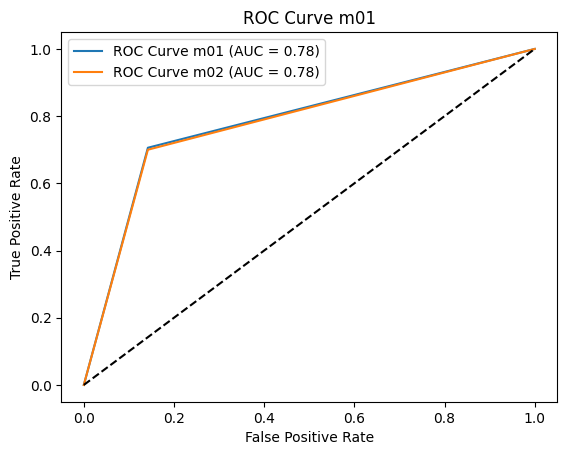

In [26]:
from sklearn.metrics import roc_curve

fpr_m01, tpr_m01, thresholds_m01 = roc_curve(Results['Actual'], Results['Survived_m01'])
fpr_m02, tpr_m02, thresholds_m02 = roc_curve(Results['Actual'], Results['Survived_m02'])

plt.figure()
plt.plot(fpr_m01, tpr_m01, label=f"ROC Curve m01 (AUC = {roc_auc_m01:.2f})")
plt.plot(fpr_m02, tpr_m02, label=f"ROC Curve m02 (AUC = {roc_auc_m02:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve m01")
plt.legend()
plt.show()

Based on the key metrics, both models (unscaled and scaled) behave similarly.

Also note, actucal data is compared with the predictions using the training data as test data does not have actucal data to compare. Although, this might indicate memorization not generalization.

**5. Interpretation:**

a. Interpret the coefficients of the logistic regression model.
b. Discuss the significance of features in predicting the target variable (survival probability in this case).

In [40]:
model_01.coef_
beta_coeff_01 = pd.DataFrame(model_01.coef_, columns = X.columns)
print('Model-01', beta_coeff_01)

model_02.coef_
beta_coeff_02 = pd.DataFrame(model_02.coef_, columns = X.columns)
print('Model-02', beta_coeff_02)

Model-01     Pclass     SibSp      Fare  Age_imput  Sex_male  Embarked_Q  Embarked_S
0 -1.07705 -0.325157  0.001779  -0.038832 -2.599161   -0.004106   -0.390356
Model-02      Pclass     SibSp      Fare  Age_imput  Sex_male  Embarked_Q  Embarked_S
0 -0.910547 -0.372344  0.082499  -0.496901 -1.268524   -0.010555   -0.184146


In [35]:
import math
print('Model-01')

for b in beta_coeff_01:
  print(b, ':' , round(((math.exp(beta_coeff_01[b][0]) - 1) * 100), 4), '%')

print('\nModel-02')
for b in beta_coeff_02:
  print(b, ':' , round(((math.exp(beta_coeff_02[b][0]) - 1) * 100), 4), '%')

Model-01
Pclass : -65.9401 %
SibSp : -27.7586 %
Fare : 0.178 %
Age_imput : -3.8088 %
Sex_male : -92.5664 %
Embarked_Q : -0.4098 %
Embarked_S : -32.3184 %

Model-02
Pclass : -59.7696 %
SibSp : -31.0883 %
Fare : 8.5997 %
Age_imput : -39.1587 %
Sex_male : -71.8753 %
Embarked_Q : -1.0499 %
Embarked_S : -16.8186 %


Based on the coefficients of both models, overall survivability is affected by all the variables in a similar manner. Example, Pclass (lower class)decreases the odds of survival per class level and Embarked Q and S have lower survival odds compared with the reference Embarked C. It is interesting to note that older passengers have lower survivaliblity according to model-02 compared to model-01. Similarly, higher fee in model-02 increase in odds of survival per unit. Both models indicates that survival of male are lower by ~92% to 72% .

In [46]:
# Test metrics (for final evaluation)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [47]:
test_data.drop('Cabin', axis = 1, inplace = True)

Age_median = train_data['Age'].median()
test_data['Age_imput'] = test_data['Age'].fillna(Age_median)

test_data.drop('Age', axis = 1, inplace = True)
test_data = test_data.dropna()

test_data = test_data.reset_index(drop = True)
#test_data.info()

test_data = pd.get_dummies(test_data, columns = ['Sex', 'Embarked'], drop_first = True)
#test_data

test_data['Embarked_Q'] = test_data['Embarked_Q'].astype('int64')
test_data['Embarked_S'] = test_data['Embarked_S'].astype('int64')
test_data['Sex_male'] = test_data['Sex_male'].astype('int64')
test_data.info()

print(test_data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Name         417 non-null    object 
 3   SibSp        417 non-null    int64  
 4   Parch        417 non-null    int64  
 5   Ticket       417 non-null    object 
 6   Fare         417 non-null    float64
 7   Age_imput    417 non-null    float64
 8   Sex_male     417 non-null    int64  
 9   Embarked_Q   417 non-null    int64  
 10  Embarked_S   417 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 36.0+ KB
   PassengerId  Pclass                                          Name  SibSp  \
0          892       3                              Kelly, Mr. James      0   
1          893       3              Wilkes, Mrs. James (Ellen Needs)      1   
2          894       2                     Myles,

In [48]:
X_test = test_data[['Pclass', 'SibSp', 'Fare', 'Age_imput', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
X_scaled_test = scaler.fit_transform(X_test)
test_pred_02 = model_02.predict(X_scaled_test)

Results = pd.DataFrame({'Survived_test_02': test_pred_02})
Results

,Survived_test_02
0,0
1,0
2,0
3,0
4,1
...,...
412,0
413,1
414,0
415,0
